In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import matplotlib.pyplot as plot
import rigol_plot as rigol
import numpy as np

In [45]:
usb = rigol.list_device()
if len(usb)<1:
    adr = u''
else:
    adr = usb[0]
print(adr)

USB0::0x1AB1::0x04CE::DS1ZA170300751::INSTR


In [46]:
time, data = rigol.read(adr,2)

0,0,1200,1,2.000000e-06,-1.200000e-03,0,8.000000e-03,0,127

b'#9000001200'
Data size: 1200 Sample rate: 2.500000e+08 Mem. depth 1200000
[ 0.424  0.408  0.416  0.392  0.4    0.384  0.392  0.376  0.384  0.36
  0.368  0.352  0.36   0.344  0.344  0.32   0.336  0.312  0.32   0.296]
[ 0.996608  0.996736  0.996672  0.996864  0.9968    0.996928  0.996864
  0.996992  0.996928  0.99712   0.997056  0.997184  0.99712   0.997248
  0.997248  0.99744   0.997312  0.997504  0.99744   0.997632]


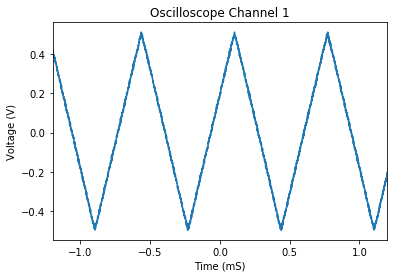

In [47]:
# See if we should use a different time axis
if (time[-1] < 1e-3):
    time = time * 1e6
    tUnit = "uS"
elif (time[-1] < 1):
    time = time * 1e3
    tUnit = "mS"
else:
    tUnit = "S"

# Plot the data
plot.plot(time, data)
plot.title("Oscilloscope Channel 1")
plot.ylabel("Voltage (V)")
plot.xlabel("Time (" + tUnit + ")")
plot.xlim(time[0], time[-1])
plot.show()